In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
#the Roboflow data is already split into train, test and validation sets

df_train = pd.read_csv('data/train/_annotations.csv')
df_test = pd.read_csv('data/test/_annotations.csv')
df_valid = pd.read_csv('data/valid/_annotations.csv')

In [3]:
df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...,768,1024,starfish,302,410,534,730
1,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,shark,106,442,175,640
2,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,fish,638,490,678,672
3,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,fish,625,107,765,187
4,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,fish,818,419,830,499


In [4]:
#Train, test and valid sample size
train_size = df_train['filename'].unique().size
test_size = df_test['filename'].unique().size
valid_size = df_valid['filename'].unique().size

print('# of images in Training set, Test set and validation set are \
{}, {}, and {} respectively'.format(train_size, test_size, valid_size))

# of images in Training set, Test set and validation set are 447, 63, and 127 respectively


In [5]:
df_data = pd.concat([df_train, df_test, df_valid])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 908
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  4817 non-null   object
 1   width     4817 non-null   int64 
 2   height    4817 non-null   int64 
 3   class     4817 non-null   object
 4   xmin      4817 non-null   int64 
 5   ymin      4817 non-null   int64 
 6   xmax      4817 non-null   int64 
 7   ymax      4817 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 338.7+ KB


In [6]:
#total number of images
df_data['filename'].unique().size

637

In [7]:
#total number of classes
df_data['class'].unique().size

7

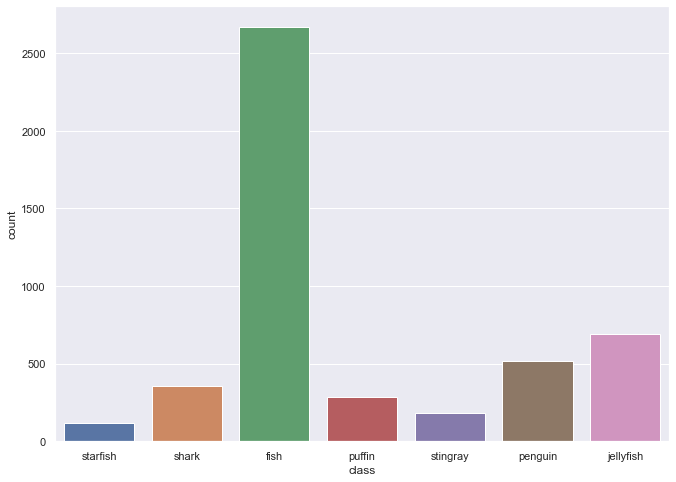

In [8]:
#Distribution of classes in dataset
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x='class', data=df_data)
plt.show()

Looks like the Fish class dominates the class distribution

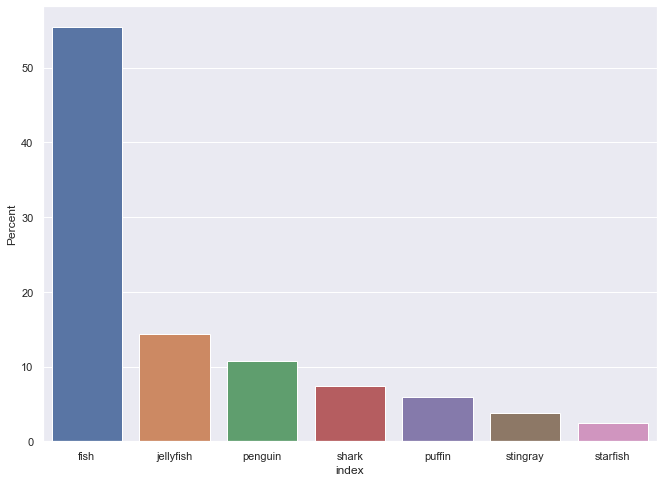

In [16]:
#Distirubution of classes in dataset (Percentage)
new_df = df_data['class'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
sns.barplot(x='index', y='Percent', data=new_df)
plt.show()

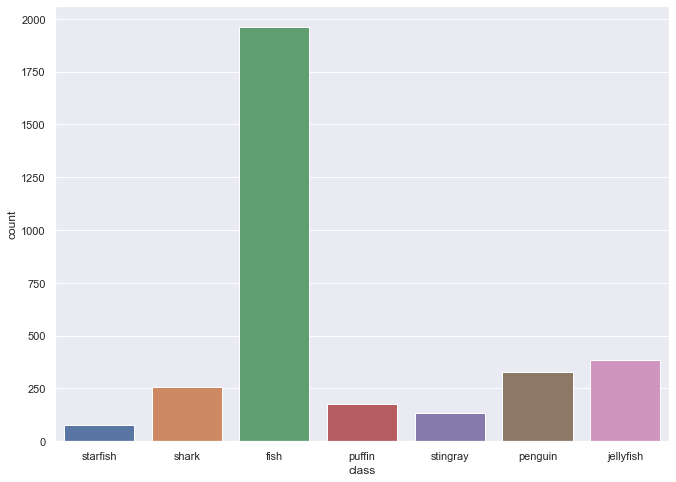

In [55]:
#Checking the distribution in training set
sns.countplot(x='class', data=df_train)
plt.show()

This shows that the training set is representative of the class distribution in original dataset

In [17]:
#Checking out a training sample example with labels
#Importing the required libraries
#from fastai import get_image_files
from fastai.vision.all import *
#from fastai.imports import *
import cv2, os
from matplotlib import patches, text, patheffects

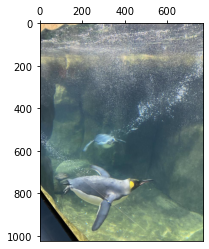

In [33]:
#Image sample 
root = 'data/'
train_images = get_image_files(root+"train")
fig, ax = plt.subplots()
path_img = train_images[1]
img = cv2.imread(str(path_img))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
ax.xaxis.tick_top()
ax.imshow(img)

In [40]:
def get_target_ds(name, df):
  rows = df[df["filename"] == name]
  return rows["class"].values, rows[bboxes_cols].values
bboxes_cols = ["xmin", "ymin", "xmax", "ymax"]
labels, bboxes = get_target_ds(path_img.name, df_train)


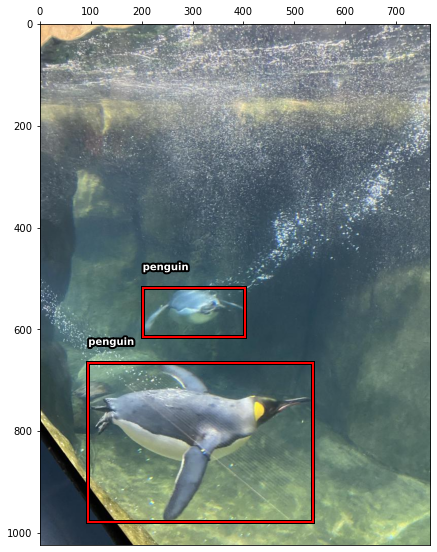

In [49]:
def get_bb(bboxes, img):
  boxes = bboxes.copy()
  boxes[:,0] = boxes[:,0]
  boxes[:,1] = boxes[:,1] 
  boxes[:,2] = boxes[:,2] - boxes[:,0]
  boxes[:,3] = boxes[:,3] - boxes[:,1]
  if boxes.shape[0] == 1 : return boxes
  return np.squeeze(boxes)
def img_show(img, ax = None, figsize=(7,11)):
  if ax is None: fig, ax = plt.subplots(figsize=figsize)
  ax.xaxis.tick_top()
  ax.imshow(img)
  return ax
def draw_outline(obj):
  obj.set_path_effects([patheffects.Stroke(linewidth=4,  foreground='black'), patheffects.Normal()])
def draw_box(img, ax, bb):
  patch = ax.add_patch(patches.Rectangle((bb[0],bb[1]), bb[2], bb[3], fill=False, edgecolor='red', lw=2))
  draw_outline(patch)
def draw_text(ax, bb, txt, disp):
  text = ax.text(bb[0],(bb[1]-disp),txt,verticalalignment='top'
  ,color='white',fontsize=10,weight='bold')
  draw_outline(text)
def plot_sample(img, bboxes, labels, ax=None, figsize=(7,11)):
  bb = get_bb(bboxes, img)
  ax = img_show(img, ax=ax)
  for i in range(len(bboxes)):
    draw_box(img,ax,bb[i])
    draw_text(ax, bb[i], str(labels[i]), img.shape[0]*0.05)
def multiplot(dim:tuple, df, images, idxs = None, figsize=(18,10)):
  if idxs is None: idxs = np.random.randint(0, len(images)-1,          dim[0]*dim[1])
  fig, ax = plt.subplots(dim[0],dim[1], figsize=figsize)
  plt.subplots_adjust(wspace=0.1, hspace=0)
  fig.tight_layout()
  for i in range(dim[0]):
    for j in range(dim[1]):
      img = images[idxs[(i+1)*j]]
      labels, bboxes = get_target_ds(img.name, df)
      img = cv2.imread(str(img), cv2.IMREAD_UNCHANGED)
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      plot_sample(img, bboxes, labels, ax=ax[i][j])

plot_sample(img, bboxes, labels)

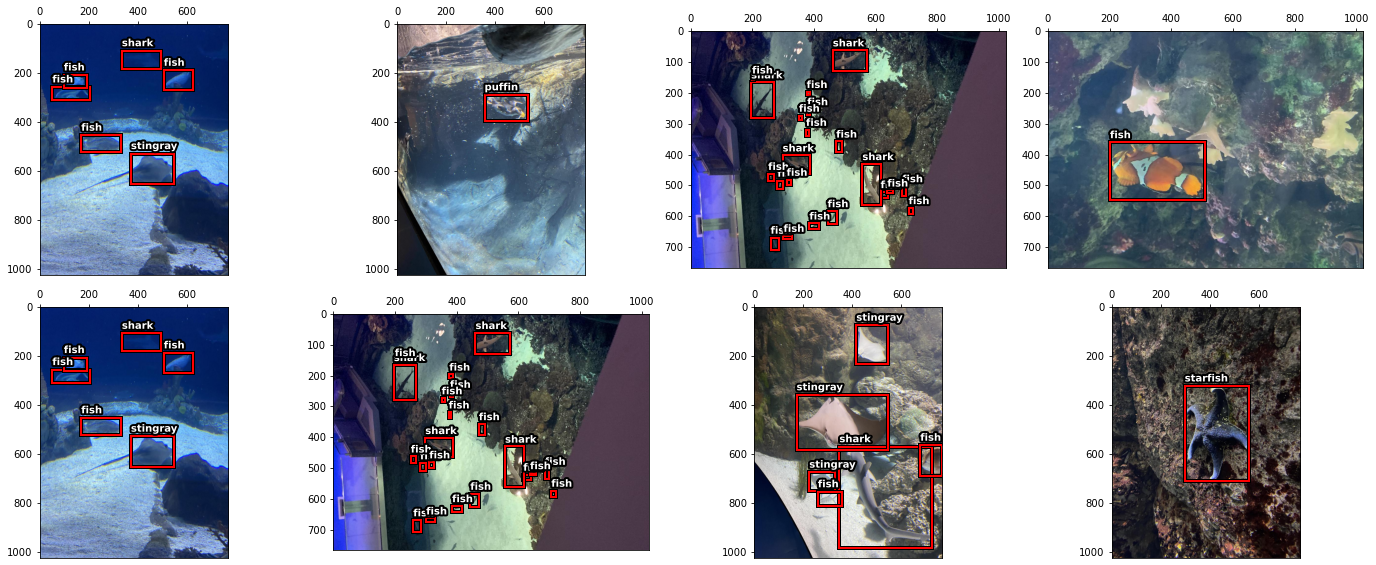

In [52]:
multiplot((2,4), df_train, train_images, figsize=(20,8))